In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns

In [10]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap

N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(41/256, 158/256,  N)
vals[:, 1] = np.linspace(67/256, 187/256, N)
vals[:, 2] = np.linspace(128/256, 255/256,  N)
vals[:, 3] *= 1
newcmp = ListedColormap(vals)

In [11]:
#Composite Dynamic
resdict_vb_d2rate = pickle.load(open( "results/Resultdicts_2_hetdyn_9.0_composite_changerate.p", "rb" ))
#Global Dynamic
resdict_con_d2rate = pickle.load(open( "results/Resultdicts_2_hetdyn_9.0_global_changerate.p", "rb" ))

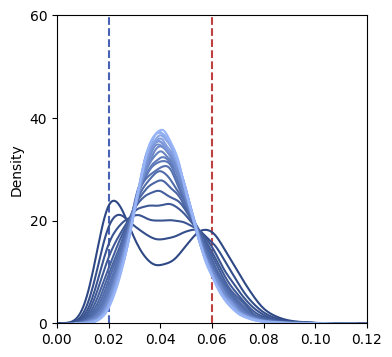

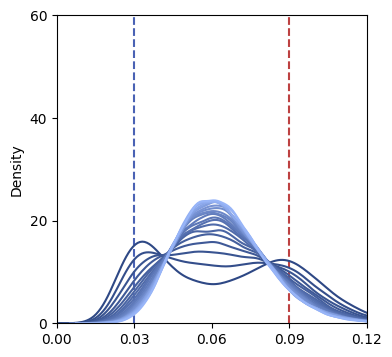

In [12]:
#composite kde
tmatrixs_vb_d2rate = {}
tmatrixs_vb_ind_d2rate_01 = {}
tmatrixs_vb_ind_d2rate_10 = {}

for j in resdict_vb_d2rate.keys():
    tmatrixs_vb_d2rate[j] = []
    tmatrixs_vb_ind_d2rate_01[j] = []
    tmatrixs_vb_ind_d2rate_10[j] = []
    for i in resdict_vb_d2rate[j]:
        tmatrixs_vb_d2rate[j].append(i.tmstar)
        for k in i.vb_tmatrices:
            tms = k.copy()
            for q in range(k.shape[0]):
                tms[q] /= tms[q].sum()
            tmatrixs_vb_ind_d2rate_01[j].append(tms[0,1])
            tmatrixs_vb_ind_d2rate_10[j].append(tms[1,0])
    tmatrixs_vb_d2rate[j] = np.array(tmatrixs_vb_d2rate[j])
            
plt.figure(figsize=(4,4))
plt.axvline(x = 0.06, ls = '--',color ='#bd4141ff')
plt.axvline(x = 0.02, ls = '--',color ='#4a62b4ff')
for j in resdict_vb_d2rate.keys():
    sns.kdeplot(data=tmatrixs_vb_ind_d2rate_01[j],color =newcmp(j/21), ls = '-',label = str(j))
plt.xticks(np.arange(0.00, 0.13, step=0.02))
plt.xlim(0,0.12)
plt.xlabel('$p_{01}$')
plt.yticks(np.arange(0, 80, step=20))
plt.title('Composite')
plt.show()
                          
plt.figure(figsize=(4,4))
plt.axvline(x = 0.09, ls = '--',color ='#bd4141ff')
plt.axvline(x = 0.03, ls = '--',color ='#4a62b4ff')
for j in resdict_vb_d2rate.keys():
    sns.kdeplot(data=tmatrixs_vb_ind_d2rate_10[j],color =newcmp(j/21), ls = '-',label = str(j))
plt.xticks(np.arange(0.00, 0.22, step=0.03))
plt.xlim(0.00, 0.12)
plt.xlabel('$p_{10}$')
plt.yticks(np.arange(0, 80, step=20))
plt.title('Composite')
plt.show()

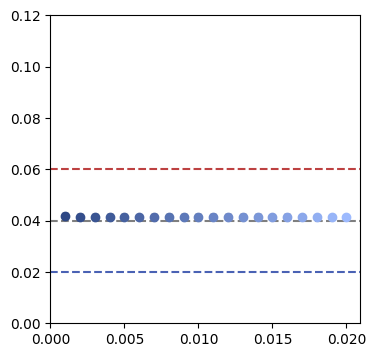

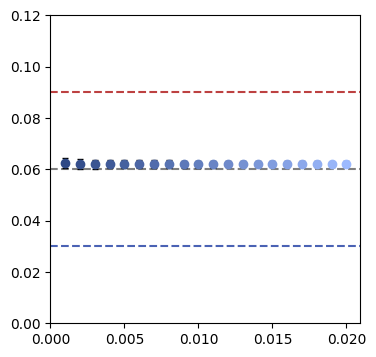

In [13]:
##composite errorbar plot
plt.figure(figsize=(4,4))
for tsh in resdict_vb_d2rate.keys():
    plt.errorbar(x = (2)*0.0005*tsh, y = np.mean(tmatrixs_vb_d2rate[tsh][:,0,1]), 
                 yerr = np.std(tmatrixs_vb_d2rate[tsh][:,0,1]),
                 fmt='o', color = newcmp(tsh/20), ecolor = 'k', capsize = 2)
plt.axhline(y = 0.06, ls = '--',color ='#bd4141ff')
plt.axhline(y = 0.04, ls = '--',color ='k',alpha=0.5)
plt.axhline(y = 0.02, ls = '--',color ='#4a62b4ff')
plt.xticks(np.arange(0.00, 0.025, step=0.005))
plt.yticks(np.arange(0.00, 0.13, step=0.02))
plt.xlabel('$p_{sf} + p_{fs}$')
plt.ylim(0,0.12)
plt.ylabel('$p_{01}$')
plt.title('Composite')

plt.figure(figsize=(4,4))
for tsh in resdict_vb_d2rate.keys():
    plt.errorbar(x = (2)*0.0005*tsh, y = np.mean(tmatrixs_vb_d2rate[tsh][:,1,0]), 
                 yerr = np.std(tmatrixs_vb_d2rate[tsh][:,1,0]),
                 fmt='o', color = newcmp(tsh/20), ecolor = 'k', capsize = 2)
plt.axhline(y = 0.09, ls = '--',color ='#bd4141ff')
plt.axhline(y = 0.06, ls = '--',color ='k',alpha=0.5)
plt.axhline(y = 0.03, ls = '--',color ='#4a62b4ff')
plt.xticks(np.arange(0.00, 0.025, step=0.005))
plt.yticks(np.arange(0.00, 0.13, step=0.02))
plt.xlabel('$p_{sf} + p_{fs}$')
plt.ylim(0.00, 0.12)
plt.ylabel('$p_{10}$')
plt.title('Composite')

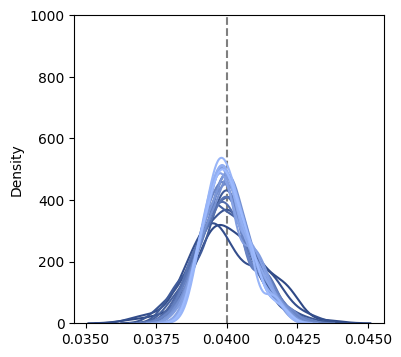

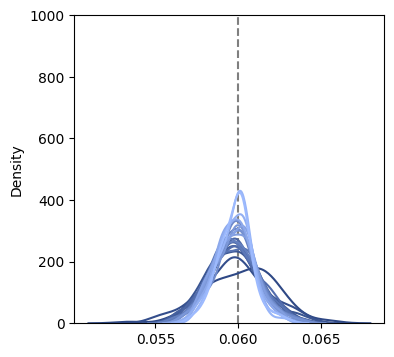

In [14]:
#global kde
tmatrixs_con_d2rate = {}
plt.figure(figsize=(4,4))
plt.axvline(x = 0.04, ls = '--',color ='k',alpha=0.5)
for j in resdict_con_d2rate.keys():
    tmatrixs_con_d2rate[j] = []
    for i in resdict_con_d2rate[j]:
        tmatrixs_con_d2rate[j].append(i.tmstar)
    
    tmatrixs_con_d2rate[j] = np.array(tmatrixs_con_d2rate[j])
    sns.kdeplot(data=tmatrixs_con_d2rate[j][:,0,1],color =newcmp(j/20), ls = '-',label = str(j))
plt.ylim(0.00,1000)
plt.xlabel('$p_{01}$')
plt.locator_params(axis='x', nbins=5)
plt.title('Global')
plt.show()

plt.figure(figsize=(4,4))
plt.axvline(x = 0.06, ls = '--',color ='k',alpha=0.5)
for j in resdict_con_d2rate.keys():
    sns.kdeplot(data=tmatrixs_con_d2rate[j][:,1,0],color =newcmp(j/20), ls = '-',label = str(j))
plt.ylim(0.00,1000)
plt.xlabel('$p_{10}$')
plt.locator_params(axis='x', nbins=5)
plt.title('Global')
plt.show()

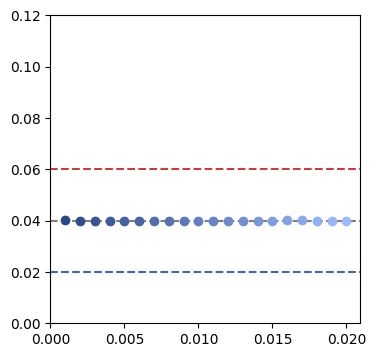

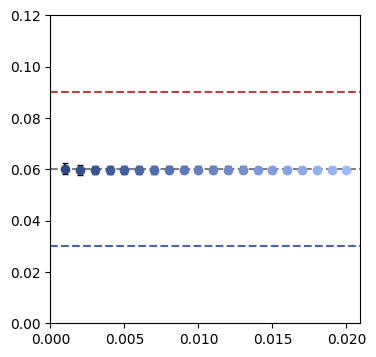

In [15]:
##global errorbar plot
plt.figure(figsize=(4,4))
for tsh in resdict_con_d2rate.keys():
    if tsh>0.5:
        plt.errorbar(x = (2)*0.0005*tsh, y = np.mean(tmatrixs_con_d2rate[tsh][:,0,1]), 
                 yerr = np.std(tmatrixs_con_d2rate[tsh][:,0,1]),
                 fmt='o', color = newcmp(tsh/20), ecolor = 'k', capsize = 2)
plt.axhline(y = 0.06, ls = '--',color ='#bd4141ff')
plt.axhline(y = 0.04, ls = '--',color ='k',alpha=0.5)
plt.axhline(y = 0.02, ls = '--',color ='#4a62b4ff')
plt.xticks(np.arange(0.00, 0.025, step=0.005))
plt.yticks(np.arange(0.00, 0.13, step=0.02))
plt.xlabel('$p_{sf} + p_{fs}$')
plt.ylim(0,0.12)
plt.ylabel('$p_{01}$')
plt.title('Global')
plt.show()

plt.figure(figsize=(4,4))
for tsh in resdict_con_d2rate.keys():
    if tsh>0.5:
        plt.errorbar(x = (2)*0.0005*tsh, y = np.mean(tmatrixs_con_d2rate[tsh][:,1,0]), 
                 yerr = np.std(tmatrixs_con_d2rate[tsh][:,1,0]),
                 fmt='o', color = newcmp(tsh/20), ecolor = 'k', capsize = 2)

plt.axhline(y = 0.09, ls = '--',color ='#bd4141ff')
plt.axhline(y = 0.06, ls = '--',color ='k',alpha=0.5)
plt.axhline(y = 0.03, ls = '--',color ='#4a62b4ff')
plt.xticks(np.arange(0.00, 0.025, step=0.005))
plt.yticks(np.arange(0.00, 0.13, step=0.02))
plt.xlabel('$p_{sf} + p_{fs}$')
plt.ylim(0.00, 0.12)
plt.ylabel('$p_{10}$')
plt.title('Global')
plt.show()

In [16]:
##Hierarchical Dynamic 
res_h_d2prop = pickle.load(open( "results/Resultdicts_2_hetdyn_9.0_hhmm_changerate.p", "rb" ))

In [ ]:
def gen_flat_tm(h_tm, exit, pi, case):
    #transposing output tmatrix
    new_tm = []
    for level in h_tm:
        new_level = []
        for tm in level:
            newt = tm.T.copy()
            new_level.append(newt)
        new_tm.append(new_level)
        
    #defining all terms
    pi_2_0 = pi[0][0][0][0]
    pi_2_1 = pi[0][0][0][1]
    pi_3_0 = pi[1][0][0][0]
    pi_3_1 = pi[1][0][0][1]
    pi_3_2 = pi[1][1][0][0]
    pi_3_3 = pi[1][1][0][1]

    E_2_0 = exit[0][0][0]
    E_2_1 = exit[0][0][1]
    E_3_0 = exit[1][0][0]
    E_3_1 = exit[1][0][1]
    E_3_2 = exit[1][1][0]
    E_3_3 = exit[1][1][1]

    A_2_00 = new_tm[0][0][0][0]
    A_2_01 = new_tm[0][0][0][1]
    A_2_10 = new_tm[0][0][1][0]
    A_2_11 = new_tm[0][0][1][1]

    A_3_00 = new_tm[1][0][0][0]
    A_3_01 = new_tm[1][0][0][1]
    A_3_10 = new_tm[1][0][1][0]
    A_3_11 = new_tm[1][0][1][1]

    A_3_22 = new_tm[1][1][0][0]
    A_3_23 = new_tm[1][1][0][1]
    A_3_32 = new_tm[1][1][1][0]
    A_3_33 = new_tm[1][1][1][1]
    
    if case == 'full':
        #populating flat_tm 
        flat_tm =  np.zeros((4,4))

        flat_tm[0,0] = A_3_00 + E_3_0*A_2_00*pi_3_0 + E_3_0*E_2_0*pi_2_0*pi_3_0
        flat_tm[0,1] = A_3_01 + E_3_0*A_2_00*pi_3_1 + E_3_0*E_2_0*pi_2_0*pi_3_1
        flat_tm[1,0] = A_3_10 + E_3_1*A_2_00*pi_3_0 + E_3_1*E_2_0*pi_2_0*pi_3_0
        flat_tm[1,1] = A_3_11 + E_3_1*A_2_00*pi_3_1 + E_3_1*E_2_0*pi_2_0*pi_3_1

        flat_tm[2,2] = A_3_22 + E_3_2*A_2_11*pi_3_2 + E_3_2*E_2_1*pi_2_1*pi_3_2
        flat_tm[2,3] = A_3_23 + E_3_2*A_2_11*pi_3_3 + E_3_2*E_2_1*pi_2_1*pi_3_3
        flat_tm[3,2] = A_3_32 + E_3_3*A_2_11*pi_3_2 + E_3_3*E_2_1*pi_2_1*pi_3_2
        flat_tm[3,3] = A_3_33 + E_3_3*A_2_11*pi_3_3 + E_3_3*E_2_1*pi_2_1*pi_3_3

        flat_tm[0,2] = E_3_0*A_2_01*pi_3_2 + E_3_0*E_2_0*pi_2_1*pi_3_2
        flat_tm[0,3] = E_3_0*A_2_01*pi_3_3 + E_3_0*E_2_0*pi_2_1*pi_3_3
        flat_tm[1,2] = E_3_1*A_2_01*pi_3_2 + E_3_1*E_2_0*pi_2_1*pi_3_2
        flat_tm[1,3] = E_3_1*A_2_01*pi_3_3 + E_3_1*E_2_0*pi_2_1*pi_3_3

        flat_tm[2,0] = E_3_2*A_2_10*pi_3_0 + E_3_2*E_2_1*pi_2_0*pi_3_0
        flat_tm[2,1] = E_3_2*A_2_10*pi_3_1 + E_3_2*E_2_1*pi_2_0*pi_3_1
        flat_tm[3,0] = E_3_3*A_2_10*pi_3_0 + E_3_3*E_2_1*pi_2_0*pi_3_0
        flat_tm[3,1] = E_3_3*A_2_10*pi_3_1 + E_3_3*E_2_1*pi_2_0*pi_3_1

        return flat_tm
    
    elif case == 'psf':
        return A_2_01, E_3_0, E_3_1, E_2_0, pi_2_1
    
    elif case == 'pfs':
        return A_2_10, E_3_2, E_3_3, E_2_1, pi_2_0
    
    else: 
        return None

In [ ]:
p01_1 = {}
p01_2 = {}
p10_1 = {}
p10_2 = {}

for resk in res_h_d2prop.keys():
    p01_1[resk] = []
    p01_2[resk] = []
    p10_1[resk] = []
    p10_2[resk] = []
    
    for ress in res_h_d2prop[resk]:
        h_tm = ress.h_tm
        exit = ress.h_exit
        pi = ress.h_pi
        flat_tm = gen_flat_tm(h_tm, exit, pi, 'full')
        
        if flat_tm[0,1] < flat_tm[2,3]:
            p01_1[resk].append(flat_tm[0,1])
            p01_2[resk].append(flat_tm[2,3])
        else:
            p01_1[resk].append(flat_tm[2,3])
            p01_2[resk].append(flat_tm[0,1]) 
            
        if flat_tm[1,0] < flat_tm[3,2]:
            p10_1[resk].append(flat_tm[1,0])
            p10_2[resk].append(flat_tm[3,2])
        else:
            p10_1[resk].append(flat_tm[3,2])
            p10_2[resk].append(flat_tm[1,0]) 

In [ ]:
def gen_gt_tm(tsh):
    t1 = np.array([            #slow 0-1
		[0.98, 0.02],
		[0.03, 0.97]])

    t2 = np.array([            #fast 0-1
        [0.94, 0.06],
        [0.09, 0.91]])

    t3 = np.array([            #slow-fast
        [1-0.0005*tsh/1., 0.0005*tsh/1.],
        [0.0005*tsh/1., 1-0.0005*tsh/1.]])

    transition = np.array([
        [t1[0][0]*t3[0][0], t1[0][1]*t3[0][0], t2[0][0]*t3[0][1], t2[0][1]*t3[0][1]],
        [t1[1][0]*t3[0][0], t1[1][1]*t3[0][0], t2[1][0]*t3[0][1], t2[1][1]*t3[0][1]],
        [t1[0][0]*t3[1][0], t1[0][1]*t3[1][0], t2[0][0]*t3[1][1], t2[0][1]*t3[1][1]],
        [t1[1][0]*t3[1][0], t1[1][1]*t3[1][0], t2[1][0]*t3[1][1], t2[1][1]*t3[1][1]]]) #replaced 3 with 1
    
    return transition

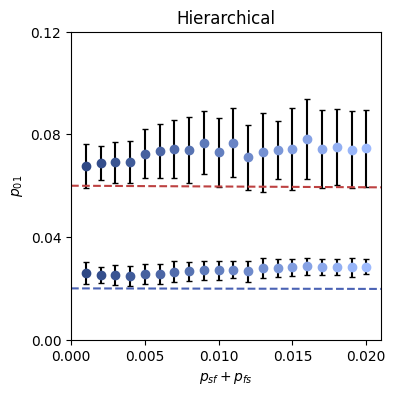

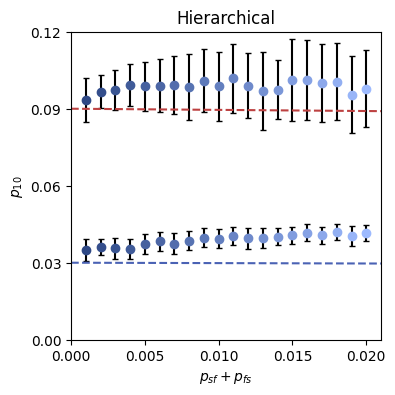

In [ ]:
#hierarchical model p01/p10

gt_01_slow = []
gt_01_fast = []
gt_10_slow = []
gt_10_fast = []

plt.figure(figsize=(4,4))
for tsh in res_h_d2prop.keys():
    #plotting hierarchical tms
    plt.errorbar(x = (2)*0.0005*tsh, y = np.mean(p01_1[tsh]), yerr = np.std(p01_1[tsh]),
                 fmt='o', color = newcmp(tsh/20), ecolor = 'k', capsize = 2)
    plt.errorbar(x = (2)*0.0005*tsh, y = np.mean(p01_2[tsh]), yerr = np.std(p01_2[tsh]),
                 fmt='o', color = newcmp(tsh/20), ecolor = 'k', capsize = 2)
    
    #getting ground truth tms
    gt_01_slow.append(gen_gt_tm(tsh)[0][1])
    gt_01_fast.append(gen_gt_tm(tsh)[2][3])
    
#plotting ground truth tms
plt.plot((2)*0.0005*np.arange(0,23), 0.02*(1-0.0005*np.arange(0,23)/1.), ls = '--', color = '#4a62b4ff')
plt.plot((2)*0.0005*np.arange(0,23), 0.06*(1-0.0005*np.arange(0,23)/1.), ls = '--', color = '#bd4141ff')

plt.xlabel('$p_{sf} + p_{fs}$')
plt.ylabel('$p_{01}$')
plt.title('Hierarchical')
plt.xlim(0,0.021)
plt.yticks(np.arange(0.00, 0.13, step=0.04))
plt.ylim(0,0.12)

plt.figure(figsize=(4,4))
for tsh in res_h_d2prop.keys():
    #plotting hierarchical tms
    plt.errorbar(x = (2)*0.0005*tsh, y = np.mean(p10_1[tsh]), yerr = np.std(p01_1[tsh]),
                 fmt='o', color = newcmp(tsh/20), ecolor = 'k', capsize = 2)
    plt.errorbar(x = (2)*0.0005*tsh, y = np.mean(p10_2[tsh]), yerr = np.std(p01_2[tsh]),
                 fmt='o', color = newcmp(tsh/20), ecolor = 'k', capsize = 2)
    
    #getting ground truth tms
    gt_10_slow.append(gen_gt_tm(tsh)[1][0])
    gt_10_fast.append(gen_gt_tm(tsh)[3][2])
    
#plotting ground truth tms
plt.plot((2)*0.0005*np.arange(0,23), 0.03*(1-0.0005*np.arange(0,23)/1.), ls = '--', color = '#4a62b4ff')
plt.plot((2)*0.0005*np.arange(0,23), 0.09*(1-0.0005*np.arange(0,23)/1.), ls = '--', color = '#bd4141ff')
plt.xlabel('$p_{sf} + p_{fs}$')
plt.ylabel('$p_{10}$')
plt.title('Hierarchical')
plt.xlim(0,0.021)
plt.yticks(np.arange(0.00, 0.22, step=0.03))
plt.ylim(0.00, 0.12)
plt.show()

In [ ]:
#calculate steady state
def calcss(tm):
    w,vs = np.linalg.eig(tm.T)
    wi = np.argmax(w) ## w[wi] = 1.
    assert np.isclose(w[wi],1.)
    v = vs[:,wi]
    v /= v.sum() ## eig makes normalized to norm=1; make prob vector by div by sum
    return v

In [ ]:
import scipy

psf = {}
pfs = {}

for resk in res_h_d2prop.keys():
    psf[resk] = []
    pfs[resk] = []
    
    for ress in res_h_d2prop[resk]:
        h_tm = ress.h_tm
        exit = ress.h_exit
        pi = ress.h_pi
        flat_tm = gen_flat_tm(h_tm, exit, pi, 'full')
        
        #getting required terms
        A_2_01, E_3_0, E_3_1, E_2_0, pi_2_1 = gen_flat_tm(h_tm, exit, pi, 'psf')
        A_2_10, E_3_2, E_3_3, E_2_1, pi_2_0 = gen_flat_tm(h_tm, exit, pi, 'pfs')
        
        #calculating steady state probabilities and psf/pfs
        ss = calcss(flat_tm)
        psf[resk].append((ss[0] * E_3_0 + ss[1] * E_3_1) / (ss[0]+ss[1]) * A_2_01)
        pfs[resk].append((ss[2] * E_3_2 + ss[3] * E_3_3) / (ss[2]+ss[3]) * A_2_10)
        
        

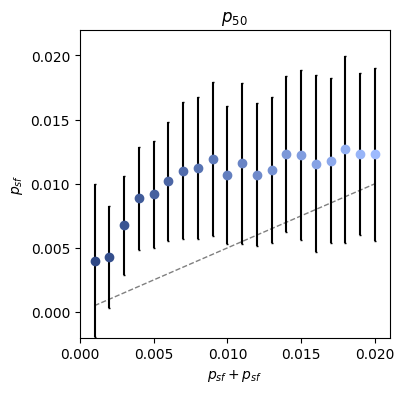

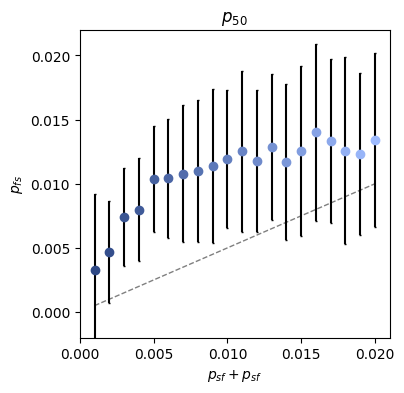

In [ ]:
#psf, pfs

plt.figure(figsize=(4,4))
for tsh in res_h_d2prop.keys():
    plt.errorbar(x = (2)*0.0005*tsh, y = np.mean(psf[tsh]), yerr = np.std(psf[tsh]),
                 fmt='o', color = newcmp(tsh/20), ecolor = 'k', capsize = 1)
plt.plot((2)*0.0005*np.arange(1,21), 0.0005*np.arange(1,21)/1., ls = '--',color ='k',alpha = 0.5, lw = 1)
plt.xlabel('$p_{sf} + p_{sf}$')
plt.ylabel('$p_{sf}$')
plt.title('$p_{50}$')
plt.xticks(np.arange(0.0,0.025, step=0.005))
plt.xlim(0,0.021)
plt.yticks(np.arange(0.0,0.030, step=0.005))
plt.ylim(-0.002,0.022)

plt.figure(figsize=(4,4))
for tsh in res_h_d2prop.keys():
    plt.errorbar(x = (2)*0.0005*tsh, y = np.mean(pfs[tsh]), yerr = np.std(psf[tsh]),
                 fmt='o', color = newcmp(tsh/20), ecolor = 'k', capsize = 1)
plt.plot((2)*0.0005*np.arange(1,21), 0.0005*np.arange(1,21)/1., ls = '--',color ='k',alpha = 0.5, lw = 1)
plt.xlabel('$p_{sf} + p_{sf}$')
plt.ylabel('$p_{fs}$')
plt.title('$p_{50}$')
plt.xticks(np.arange(0.0,0.025, step=0.005))
plt.xlim(0,0.021)
plt.yticks(np.arange(0.0,0.030, step=0.005))
plt.ylim(-0.002,0.022)